## Hands On!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

## Import Dataset

##### data from teleohone customers 
##### region Until reside => X , custcat => Y

In [2]:
df = pd.read_csv("../00-storage/csv-store/teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis

##### 1 => Basic Service 
##### 2 => E-Service Customers 
##### 3 => Plus Service 
##### 4 => Total Service 

In [3]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

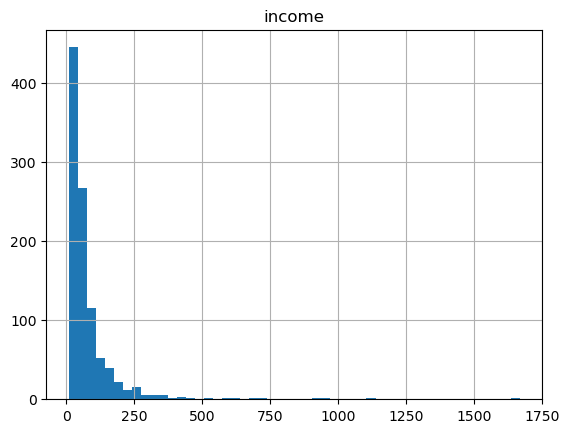

In [4]:
df.hist(column="income", bins=50)
plt.show()

## Feature Set

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

##### to use scikit-kearn lib, we have to convert the pandas data frame to a numpy array

In [6]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [7]:
Y = df["custcat"].values
Y[0:5]

array([1, 4, 3, 1, 3])

## Normalize Data

#### Tip:
##### ما به دلایلی باید دیتاهامونو نورمالایز بکنیم! مثلا فرض کنید ما توی دیتامون حقوق رو داریم از صفر تا 1750 و سنم دارم از صفر تا 200 و میخوام اینارو باهم مقایسه بکنم 
##### و مثلا توی نمودار سن یارو یک خط خیلی کوچیک میخورد و درآمدش یک خط خیلی بزرگ (اعداد زیاد فرق دارن) 
#### Tip:
##### یک بحث دیگه اینه که ممکنه دیتاها خوب پخش نشده باشند ، پس میایم میگیم میانگین اینارو بنداز رو صفر (مثلا روی یک نمودار نورمالایز) و مثلا یخورده اینور صفر میشه 
##### عدد بعدی و یخورده قبل صفر میشه عدد قبلی و دیگه مثلا ما برای یک سن 80 سالع خیلی دور نمیشیم از نمودار و البته زمانی که حقوق اضافه بشه بهمون
##### و اینجا میایم میگیم بیا میانگین حقوق رو بنداز رو همین صفر و دیتاها تقسیم میشه توی یک نمودار نورمال به شکل قشنگ و کشیده طور 
#### Tip:
##### دلیل استفادع از نمودار نورمال هم اینه که وقتی میانگین رو ما صفر میزاریم پس صفر درواقع به دلیل میانگین بودن دیتاهای زیادی دور و برش خواهد بود 
##### 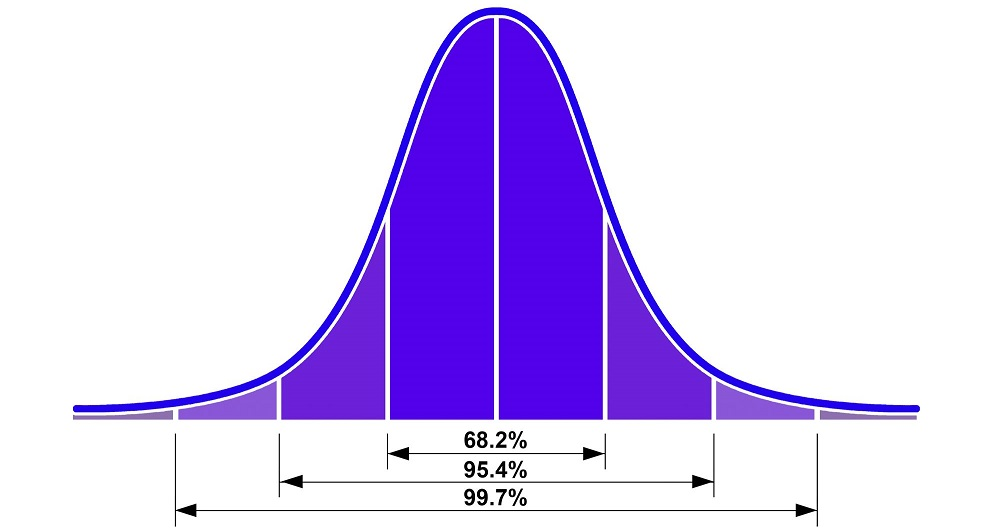

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

##### Tip: The mothod above isn't very correct, and it's better to use the method below for normalizing
##### Des: فرض کنید ما مدلمون رو درست کردیم و سنجیدیم! ولی الان ما میخواهیم یک دیتای جدیدی رو بسنجم حالا باید چیکار کنم؟ پس میایم اسکیلر رو جدا میکنیم چون ما نمیخایم همیشه 
##### دیتای اسکیل شده رو بدیم و مثلا دوست داریم همون اعداد رو طبق دیتاست مون بدیم 
##### Guid: End of codes with @

In [9]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X[0:3]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004]])

## Train Test Split

##### using the automatic method with th sicik-learn library instead of writing it manually
##### random_state in train_test_split func => repeatable partitioning

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)
print("Train Set:", X_train.shape, Y_train.shape)
print("Train Set:", X_test.shape, Y_test.shape)

Train Set: (800, 11) (800,)
Train Set: (200, 11) (200,)


## Classification

### K Nearest Neighbor (KNN)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#### Traininig

##### K can be various numbers

In [12]:
k = 5
#Train Model and Predict 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, Y_train)
neigh

KNeighborsClassifier()

### Predicting 

In [13]:
Yhat = neigh.predict(X_test)
print("Pridicted Y", Yhat[0:5])
print("Real Y In Dataset", Y[0:5])

Pridicted Y [1 3 3 4 4]
Real Y In Dataset [1 4 3 1 3]


## Accuracy Evaluation

In [14]:
from sklearn import metrics
print("Train Set Accuracy: ", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("Test Set Accuracy: ", metrics.accuracy_score(Y_test, Yhat))

Train Set Accuracy:  0.5375
Test Set Accuracy:  0.315


## @ => New Customer Without Normalize Data

In [15]:
newx = [[  2.,  13.,  44.,   1.,   9.,  1500.,   4.,   5.,   0.,   0.,   2.]] #=> change income to 1500 (in reality is 1,500,000)
#lets scale data 
NXS = scaler.transform(newx)
neigh.predict(NXS)

array([2])

## Practice

In [16]:
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.315


## What about other K?

##### std_acc => use od standard error formula : SE = std/√n

In [17]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    #Train Model And Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, Y_train)
    Yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Yhat)
    std_acc[n-1] = np.std(Yhat==Y_test)/np.sqrt(Yhat.shape[0])

print(mean_acc)
print(std_acc)

[0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
[0.0324037  0.03208582 0.03284623 0.03298485 0.03284623 0.03270321
 0.03337477 0.0331191  0.03349627]


### Plot the model accuracy for a diffrent number of neighbors

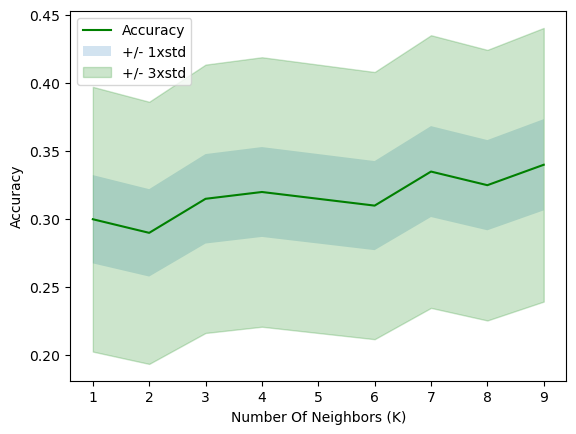

In [18]:
plt.plot(range(1, Ks), mean_acc, "g")

plt.fill_between(range(1, Ks), (mean_acc - 1 * std_acc), (mean_acc + 1 * std_acc), alpha=0.20)
plt.fill_between(range(1, Ks), (mean_acc - 3 * std_acc), (mean_acc + 3 * std_acc), alpha=0.20, color="green")

plt.legend(("Accuracy", "+/- 1xstd", "+/- 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number Of Neighbors (K)")

plt.show()

In [19]:
print("The best accuracy was with", mean_acc.max(), "with K=", mean_acc.argmax()+1)

The best accuracy was with 0.34 with K= 9
